# Lecture 8: Introduction to Linear Regression

In this notebook, we will:
1. Load and visualize the education dataset
2. Implement simple linear regression using the closed-form solution
3. Compare our implementation with sklearn's LinearRegression
4. Make predictions and plot the regression line
5. Compute and interpret RMSE and R²

In [14]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Load and Explore the Data

We'll use the Education Longitudinal Study (ELS) dataset, which contains information about high school students including their test scores and socioeconomic status.

Our goal: **Predict reading scores from math scores**

In [15]:
# We use pandas only for loading the .dta file; we'll work with numpy arrays
import pandas as pd

# Load the dataset
df = pd.read_stata('https://raw.githubusercontent.com/fhfarnoud/intro2ml/main/2026S/data/els_small.dta')

# Clean: remove rows with non-numeric values
df = df[pd.to_numeric(df['bymath'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['byread'], errors='coerce').notnull()]

# Sample for clearer visualizations
np.random.seed(42)  # For reproducibility
df = df.sample(n=500)

# Extract as numpy arrays
mathscore = np.array(df['bymath'].values, dtype=float)
readscore = np.array(df['byread'].values, dtype=float)

print(f"Number of students: {len(mathscore)}")
print(f"Math score range: {mathscore.min():.1f} to {mathscore.max():.1f}")
print(f"Reading score range: {readscore.min():.1f} to {readscore.max():.1f}")

Number of students: 500
Math score range: 24.9 to 76.9
Reading score range: 25.8 to 75.4


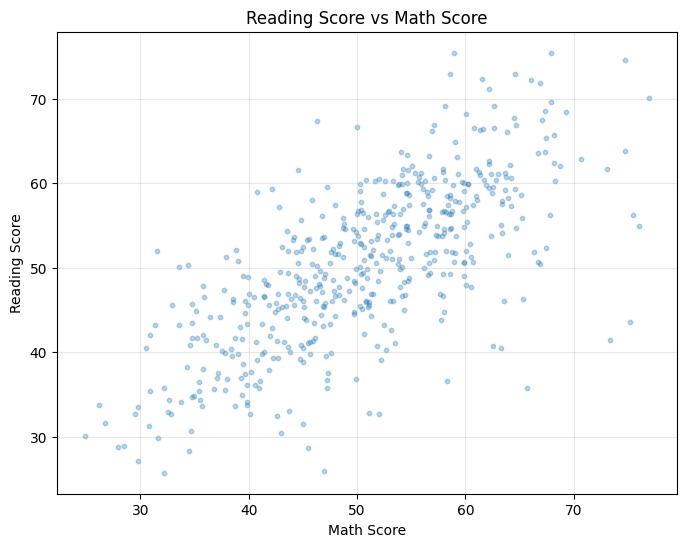

In [16]:
# Visualize the relationship between math and reading scores
plt.figure(figsize=(8, 6))
plt.scatter(mathscore, readscore, alpha=0.3, s=10)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Reading Score vs Math Score')
plt.grid(True, alpha=0.3)
plt.show()

**Question:** Does the relationship look approximately linear? Would a line be a reasonable model?

**Answer:** Yes, the relationship appears approximately linear — as math scores increase, reading scores tend to increase at a roughly constant rate. There is scatter around any potential line (students with the same math score have different reading scores), but the overall trend is linear. A line would be a reasonable first model for this data.

## Part 2: Implement the Closed-Form Solution

Recall from lecture, the closed-form solution for linear regression $y = ax + b$ is:

$$\hat{a} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}$$

$$\hat{b} = \bar{y} - \hat{a} \cdot \bar{x}$$

Let's implement this!

In [17]:
# Define x and y for our regression
x = mathscore
y = readscore

# Compute the means
x_bar = np.mean(x)
y_bar = np.mean(y)

print(f"Mean math score: {x_bar:.2f}")
print(f"Mean reading score: {y_bar:.2f}")

Mean math score: 50.64
Mean reading score: 50.43


In [18]:
### BEGIN SOLUTION
numerator = np.sum((x - x_bar) * (y - y_bar))
denominator = np.sum((x - x_bar) ** 2)
a = numerator / denominator
### END SOLUTION

print(f"Slope (a): {a:.4f}")

"""Check"""
assert abs(a - 0.6901) < 0.01, f"Expected slope ~0.69, got {a:.4f}"

Slope (a): 0.6901


In [19]:
### BEGIN SOLUTION
b = y_bar - a * x_bar
### END SOLUTION

print(f"Intercept (b): {b:.4f}")

"""Check"""
assert abs(b - 15.4841) < 0.1, f"Expected intercept ~15.48, got {b:.4f}"

Intercept (b): 15.4841


In [20]:
print(f"\nOur linear model: reading_score = {a:.4f} * math_score + {b:.4f}")
print(f"\nInterpretation:")
print(f"  - For each 1-point increase in math score, reading score increases by {a:.2f} points")
print(f"  - A student with math score 0 would have predicted reading score of {b:.2f}")


Our linear model: reading_score = 0.6901 * math_score + 15.4841

Interpretation:
  - For each 1-point increase in math score, reading score increases by 0.69 points
  - A student with math score 0 would have predicted reading score of 15.48


## Part 3: Compare with sklearn's LinearRegression

Let's verify our implementation by comparing with sklearn.

### sklearn LinearRegression API

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()      # Create the model
model.fit(X, y)                 # Train on data (X must be 2D)

model.coef_                     # Slope(s) - array of coefficients
model.intercept_                # Intercept (scalar)
```

**Note:** sklearn requires X to be 2D (shape `(N, D)`), even for simple regression with one feature.

In [21]:
# sklearn requires 2D input, so we reshape
X = mathscore.reshape(-1, 1)  # shape: (N, 1)

### BEGIN SOLUTION
model = LinearRegression()
model.fit(X, y)
a_sklearn = model.coef_[0]
b_sklearn = model.intercept_
### END SOLUTION

print(f"sklearn slope: {a_sklearn:.4f}")
print(f"sklearn intercept: {b_sklearn:.4f}")
print(f"\nOur slope: {a:.4f}")
print(f"Our intercept: {b:.4f}")
print(f"\nDifference in slope: {abs(a - a_sklearn):.10f}")
print(f"Difference in intercept: {abs(b - b_sklearn):.10f}")

"""Check"""
assert abs(a - a_sklearn) < 1e-10, f"Slope mismatch: manual={a}, sklearn={a_sklearn}"
assert abs(b - b_sklearn) < 1e-10, f"Intercept mismatch: manual={b}, sklearn={b_sklearn}"

sklearn slope: 0.6901
sklearn intercept: 15.4841

Our slope: 0.6901
Our intercept: 15.4841

Difference in slope: 0.0000000000
Difference in intercept: 0.0000000000


The values should match (up to numerical precision)!

## Part 4: Make Predictions and Visualize

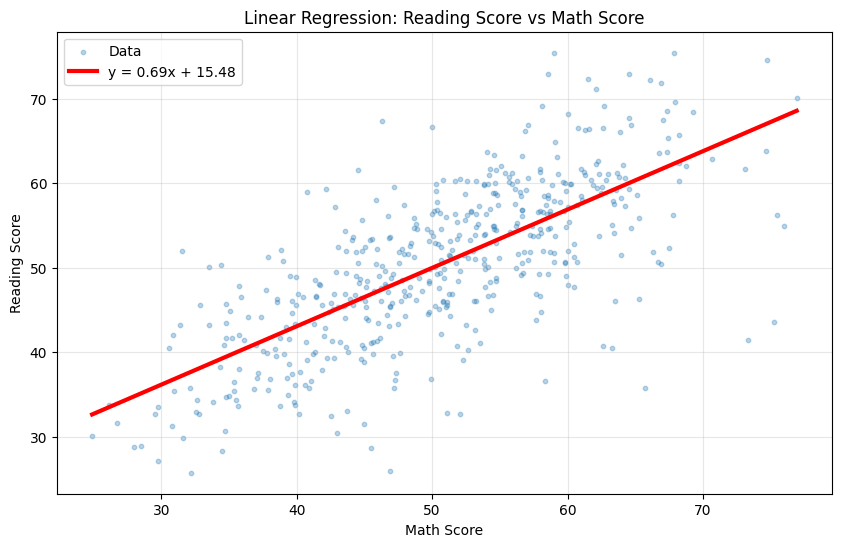

In [22]:
# Create predictions for plotting the line
x_line = np.array([mathscore.min(), mathscore.max()])
y_line = a * x_line + b

# Plot data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(mathscore, readscore, alpha=0.3, s=10, label='Data')
plt.plot(x_line, y_line, 'r-', linewidth=3, label=f'y = {a:.2f}x + {b:.2f}')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Linear Regression: Reading Score vs Math Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Making Predictions

**Manual prediction:** Use the linear equation directly:
$$\hat{y} = a \cdot x + b$$

**sklearn prediction:**
```python
model.predict(X_new)    # X_new must be 2D, returns array of predictions
```

In [23]:
# Make predictions for specific math scores
test_scores = np.array([30, 50, 70, 90])

### BEGIN SOLUTION
pred_manual = a * test_scores + b
pred_sklearn = model.predict(test_scores.reshape(-1, 1))
### END SOLUTION

print("Predictions:")
print("-" * 50)
print(f"{'Math Score':<12} {'Manual':<12} {'sklearn':<12}")
print("-" * 50)
for i in range(len(test_scores)):
    print(f"{test_scores[i]:<12} {pred_manual[i]:<12.1f} {pred_sklearn[i]:<12.1f}")

Predictions:
--------------------------------------------------
Math Score   Manual       sklearn     
--------------------------------------------------
30           36.2         36.2        
50           50.0         50.0        
70           63.8         63.8        
90           77.6         77.6        


### Predictions for Evaluation

To compute evaluation metrics (RMSE, R²), we need predictions for **all** data points, not just a few test scores.

In [24]:
### BEGIN SOLUTION
y_pred = a * x + b
### END SOLUTION

print(f"Generated {len(y_pred)} predictions")
print(f"Prediction range: {y_pred.min():.1f} to {y_pred.max():.1f}")

"""Check"""
assert y_pred.shape == (500,), f"Expected shape (500,), got {y_pred.shape}"

Generated 500 predictions
Prediction range: 32.7 to 68.6


## Part 5: Evaluation Metrics

Now let's compute RMSE and R² to evaluate how well our model fits the data.

**Note:** We're evaluating on the same data we trained on (no train/test split yet). This tells us how well the model fits, but not how well it generalizes to new data.

### MSE and RMSE

**MSE (Mean Squared Error):** Average of squared errors
$$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$

**RMSE (Root Mean Squared Error):** Square root of MSE
$$\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}$$

RMSE has the same units as y, making it interpretable as "typical prediction error."

**sklearn:**
```python
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)  # Returns MSE
rmse = np.sqrt(mse)                        # Take sqrt for RMSE
```

In [25]:
### BEGIN SOLUTION
SSE = np.sum((y - y_pred) ** 2)
N = len(y)
RMSE_manual = np.sqrt(SSE / N)
RMSE_sklearn = np.sqrt(mean_squared_error(y, y_pred))
### END SOLUTION

print(f"RMSE (manual):  {RMSE_manual:.2f}")
print(f"RMSE (sklearn): {RMSE_sklearn:.2f}")
print(f"\nInterpretation: On average, our predictions are off by about {RMSE_manual:.1f} points")

"""Check"""
assert abs(RMSE_manual - RMSE_sklearn) < 1e-10, f"RMSE mismatch: manual={RMSE_manual}, sklearn={RMSE_sklearn}"
assert abs(RMSE_manual - 6.69) < 0.1, f"Expected RMSE ~6.69, got {RMSE_manual:.2f}"

RMSE (manual):  6.69
RMSE (sklearn): 6.69

Interpretation: On average, our predictions are off by about 6.7 points


### R² (Coefficient of Determination)

$$R^2 = 1 - \frac{\text{SSE}}{\text{SST}} = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}$$

R² represents the fraction of variance in y explained by the model.

**sklearn:**
```python
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)  # Computes ȳ and SST internally
```

In [26]:
### BEGIN SOLUTION
SST = np.sum((y - y_bar) ** 2)
R2_manual = 1 - SSE / SST
R2_sklearn = r2_score(y, y_pred)
### END SOLUTION

print(f"R² (manual):  {R2_manual:.4f}")
print(f"R² (sklearn): {R2_sklearn:.4f}")
print(f"\nInterpretation: Math score explains {R2_manual*100:.1f}% of the variance in reading score")

"""Check"""
assert abs(R2_manual - R2_sklearn) < 1e-10, f"R² mismatch: manual={R2_manual}, sklearn={R2_sklearn}"
assert abs(R2_manual - 0.5108) < 0.01, f"Expected R² ~0.51, got {R2_manual:.4f}"

R² (manual):  0.5108
R² (sklearn): 0.5108

Interpretation: Math score explains 51.1% of the variance in reading score


## Summary

In this notebook, we:

1. **Loaded** the ELS education dataset with math and reading scores
2. **Implemented** the closed-form solution for simple linear regression:
   - $\hat{a} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$
   - $\hat{b} = \bar{y} - \hat{a}\bar{x}$
3. **Verified** our results match sklearn's LinearRegression
4. **Made predictions** using both manual formula and `model.predict()`
5. **Computed evaluation metrics**:
   - RMSE: typical prediction error (same units as y)
   - R²: fraction of variance explained

**Next time:** Multiple regression with more than one feature!